<h1 style="text-align:left;font-size:200%;;">Étude Comparative de Modèles de Classification pour la Prédiction du Revenu Annuel : Approche avec Arbre de Décision et Forêt Aléatoire</h1>
<h4 style="text-align:left;">Préparé par  : BOUKIR Fatima Ezzahrae </h4>
<h4 style="text-align:left;">Encadré par  : Dr. BOUKROUCH Ikhlass</h4>

# Sommaire <a id="top"></a>

### I. [Introduction](#I-Introduction)

### II. [Les arbres de décision](#II-Les-arbres-de-décision)
1. [Les avantages & les inconvénients d'arbre de décision](#1-Les-avantages-et-les-inconvénients-darbre-de-décision)
2. [Comment construit-on les arbres de décision?](#2-Comment-construit-on-les-arbres-de-décision)
3. [Impureté de Gini](#3-Impureté-de-Gini)
4. [Information gain (Entropie)](#4-Information-gain-Entropie)
5. [Quelle métrique utiliser?](#5-Quelle-métrique-utiliser)
6. [Pruning](#6-Pruning)

### III. [Les forêts aléatoires](#III-Les-forêts-aléatoires)
1. [Les avantages & les inconvénients d'une forêt aléatoire](#III-1-Les-avantages-et-les-inconvénients-dune-forêt-aléatoire)
2. [Comment construit-on les forêts aléatoires?](#III-2-Comment-construit-on-les-forêts-aléatoires)
3. [Les paramètres importants d'une forêt aléatoire](#III-3-Les-paramètres-importants-dune-forêt-aléatoire)

### IV. [Application](#IV-Application)
1. [Contexte et Objectifs de l'Analyse](#IV-1-Contexte-et-Objectifs-de-lanalyse)
2. [Etape 0 : Importation des bibliothèques](#IV-2-Étape-0-Importation-des-bibliothèques)
3. [Etape 1 : Importation de la base de données](#IV-3-Étape-1-Importation-de-la-base-de-données)
4. [Etape 2 : Exploration et visualisation des données](#IV-4-Étape-2-Exploration-et-visualisation-des-données)
5. [Etape 3 : Préparation des données pour l'entrainement](#IV-5-Étape-3-Préparation-des-données-pour-lentrainement)
6. [Etape 4 : Entrainement & Evaluation du modèle de l'arbre de décision](#IV-6-Étape-4-Entrainement-et-Evaluation-du-modèle-de-larbre-de-décision)
7. [Etape 5 : Entrainement & Evaluation du modèle de la forêt aléatoire](#IV-7-Étape-5-Entrainement-et-Evaluation-du-modèle-de-la-forêt-aléatoire)

### V. [Conclusion](#V-Conclusion)


### I.Introduction

&nbsp; &nbsp;  Un arbre de décision est un algorithme d'apprentissage automatique de classification et de régression supervisé,qui prend des décisions en formulant des questions sur les caractéristiques des données et en suivant les branches de l'arbre basées sur les réponses à ces questions.

&nbsp; &nbsp;  L'idée principale derrière un arbre de décision consiste à segmenter de manière itérative l'ensemble de données en sous-ensembles homogènes, en se basant sur les caractéristiques des données: chaque nœud de l'arbre représente une question sur une caractéristique particulière, chaque branche représente une réponse à cette question, et chaque feuille de l'arbre représente une décision ou une prédiction.

&nbsp; &nbsp;   Il est réputé pour être l'une des méthodes les plus intuitives et les plus faciles à comprendre. Cela en fait également un bon algorithme de départ pour apprendre les particularités de l'ensemble de données.

&nbsp; &nbsp;   **Exemple** : ![image.png](https://dv495y1g0kef5.cloudfront.net/single_notebooks/img/binary_decision_tree.png)


&nbsp; &nbsp;   Une forêts aléatoires ou Random Forests est une collection de nombreux arbres de décision.

Cet algorithme est l'un des rares modèles non basés sur des réseaux neuronaux qui offre une très haute précision pour les tâches de régression et de classification. Il donne des bon résultats.

l'algorithme de la forêt aléatoire utilise une approche de régularisation qui limite l'accès des arbres à des caractéristiques spécifiques, contribuant à des performances optimisées et minimisant le risque de surajustement(overfitting). 

&nbsp; &nbsp;   **Exemple** : ![image.png](https://th.bing.com/th/id/OIP.aXZgUGSguz6o8jfdId8ZyAHaF3?rs=1&pid=ImgDetMain)

Dans ce qui suit, on va presenter la construction de ces deux méthodes et un exemple pratique.


 ### II.Les arbres de décision 

1. **Les avantages & les inconvénients d'arbre de décision**

| Avantages                                | Inconvénients                                                |
|:------------------------------------|:-----------------------------------------------------|
| Intuitif                           | Résultats moyens                                     |
| Facile à visualiser et interpréter | Les arbres peuvent être instables par rapport aux données d'entraînement |
| Sélection de fonction intégrée     | Algorithmes d'apprentissage gourmands                  |
| Aucun prétraitement requis         | Susceptible au surajustement (des mesures existent pour y remédier) |
| Performe bien avec de grands ensembles de données |                                                  |
| Formation modérément rapide et prédictions extrêmement rapides |                                       |


2. **Comment construit-on les arbres de décision?**

La construction des arbres de décision utilise des algorithmes voraces (greedy) qui choisissent la meilleure option disponible à chaque étape, sans considérer l'image complète. Ces algorithmes sont rapides mais peuvent parfois produire des solutions sous-optimales. Ils construisent l'arbre en ajoutant un nœud à la fois, cherchant la meilleure façon de diviser les données à chaque étape. Différentes métriques, telles que l'impureté de Gini et le gain d'information (entropie), définissent ce qui est considéré comme la "meilleure" division.

3. **Impureté de Gini**

Avant d'entamer le vif du sujet, il convient de noter ce qui compte vraiment pour les algorithmes : le nombre d'échantillons de chaque classe présents dans le nœud. Ils n'examinent pas l'arbre dans son intégralité, mais plutôt un nœud à la fois. Dans ce contexte, un nœud peut être appelé "division", puisque nous divisons nos données en deux - pour Oui ou Non. 

Par exemple, un nœud qui achemine toutes les données vers la branche gauche et aucune vers la branche droite pourrait être une très mauvaise division, puisque nous n'avons rien changé. n'avons rien changé en réalité.

Le rôle des métriques est de quantifier exactement la qualité d'une division (split) lors de la construction d'un arbre de décision. 
La formule mathématique et donné par :$$ Gini = 1 - \sum_{i=1}^{n} p_i^2 $$
avec: n est les classes,et les pi représentant la proportion d'échantillons appartenant à la classe i



4. **Information gain (Entropie)**

Il s'agit d'une autre mesure permettant d'évaluer la qualité d'une division. Elle est souvent appelée entropie en raison d'une métrique très similaire dans la théorie de l'information. L'entropie est une mesure de la quantité d'informations contenues dans un ensemble. Sa formule est la suivante : $$ Entropie = -\sum{p_i \log_2{p_i}} $$

Le rôle du gain d'information est de calculer l'entropie (contenu informationnel) dans les nœuds enfants, puis de soustraire cette valeur de l'entropie du nœud parent. Cela permet de déterminer la quantité d'informations qui peut être obtenue en effectuant cette division


5. **Quelle métrique utiliser?**

En théorie, l'impureté de Gini favorise les partitions plus grandes, tandis que le gain d'information favorise les plus petites. Cependant, en pratique, la différence entre les deux n'est pas significative, avec seulement 2% des cas où la métrique utilisée a un impact. La décision entre Gini et l'entropie n'influence pas les résultats. De plus, le gain d'information est légèrement plus coûteux en termes de calcul en raison de l'utilisation de logarithmes. 
C'est pourquoi la plupart des implémentations préfèrent utiliser Gini par défaut.

6. **Pruning**  

Même si les arbres de décision sont des modèles relativement simples, ils ont tendance au surajustement, et cela peut être prononcé. Cela se manifeste par le fait que l'arbre peut avoir un nombre excessif de nœuds et de divisions, s'étendant potentiellement à l'infini. 

Pour atténuer ce problème, une technique appelée élagage (pruning) est souvent utilisée, consiste à ajuster la taille de l'arbre en retirant certaines de ses branches. 
Il existe deux types principaux de pruning : 

**le pruning précoce**: qui arrête la croissance de l'arbre avant qu'il ne devienne trop complexe.

**le pruning postérieur**:qui construit l'arbre complet puis le taille en retirant certaines branches après évaluation des performances sur des données de validation.
![image.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*WQfd2tteLlic7-pu_FxjfQ.png)

 ### III.Les forêts aléatoires

1. **Les avantages & les inconvénients d'une forêt aléatoire**

| Avantages                                | Inconvénients                                                |
|:------------------------------------|:-----------------------------------------------------|
| - Grande précision et robustesse	                          | - Plus complexe à interpréter que les arbres individuels                                     |
| - Performe bien avec de grands ensembles de données | - Plus de temps de calcul par rapport à un simple arbre de décision |
| Sélection de fonction intégrée     | 
| - Réduit le surajustement        |  - Le modèle peut devenir trop complexe sur des ensembles de données plus petits |
| - Gère efficacement les données manquantes et les valeurs aberrantes |                                                  |


2. **Comment construit-on les forêts aléatoires?**

La construction des Random Forests repose sur la création d'un ensemble d'arbres de décision, chacun formé sur un sous-ensemble aléatoire des données d'entraînement.


- **Bootstrap Sampling:**

Pour éviter que tous les arbres ne soient formés sur le même ensemble de données,la technique du bootstrap est employée. Cette méthode consiste à échantillonner uniformément à partir de l'ensemble de données d'origine avec remplacement, créant ainsi de nouveaux ensembles de données.

Le processus de bootstrapping contribue à diversifier les données d'entraînement, renforçant la capacité du modèle à généraliser de manière robuste aux données inédites.

- **Feature Randomization***

À chaque division d'un nœud, un sous-ensemble aléatoire de caractéristiques est considéré

- **Agrégation des Prédictions:***

Les prédictions individuelles des arbres sont agrégées pour obtenir la prédiction finale.

3. **les paramètres importants d'une forêt aléatoire**

- **Nombre d'arbres (n_estimators)**

Contrôle le nombre d'arbres dans l'ensemble. Une valeur plus élevée améliore la performance mais augmente le temps de calcul.

- **Profondeur maximale des arbres (max_depth):**


Limite la profondeur maximale de chaque arbre, contrôlant le niveau de complexité.

- **Nombre minimal d'échantillons par feuille (min_samples_leaf)**

Définit le nombre minimal d'échantillons requis pour former une feuille, influençant la régularisation.

 ### IV.Application

#### Contexte et Objectifs de l'Analyse


Ce script a pour objectif d'explorer et de modéliser les données relatives au revenu annuel des individus en utilisant un arbre de décision & Random Forest. 
L'analyse vise à construire un modèle prédictif précis en se basant sur des caractéristiques telles que l'âge, le niveau d'éducation, l'occupation, l'état civil, etc. L'ensemble du processus comprend l'exploration des données, 
le prétraitement, la construction du modèle, l'évaluation des performances, et l'interprétation des résultats.
![image.png](https://www.economie.gouv.fr/files/styles/image_contenu_article_espace/public/files/directions_services/cedef/images_fichespratiques/Definition_Revenu.jpg?itok=bOC9nTur)


**Age**: L'âge de la personne.

**Workclass**: Le type d'emploi ou de secteur d'activité dans lequel la personne travaille (par exemple, State-gov, Self-emp-not-inc, Private, etc.).

**fnlwgt**: Poids final, un facteur utilisé pour ajuster les données pour refléter la population totale.

**Education**: Le niveau d'éducation atteint par la personne (par exemple, Bachelors, HS-grad, 11th, etc.).

**Education-num**: Le nombre d'années d'éducation formelle.

**Marital status**: L'état civil de la personne (par exemple, Never-married, Married-civ-spouse, Divorced, etc.).

**Occupation**: Le type d'occupation de la personne (par exemple, Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, etc.).

**Relationship**: La relation de la personne par rapport à d'autres membres de la famille.

**Race**: La race de la personne.

**Sex**: Le genre de la personne.

**Capital-gain**: Les gains en capital de la personne.

**Capital-loss**: Les pertes en capital de la personne.

**Hours-per-week**: Le nombre d'heures travaillées par semaine.

**Native-country**: Le pays d'origine de la personne.

**Income**: Le revenu de la personne, généralement binaire (<=50K ou >50K), indiquant si la personne gagne moins ou plus de 50 000 dollars par an.

#### Etape 0 : Importation des bibliothèques

In [23]:
#Importation des packages nécessaires

import pyforest # Pyforest simplifie l'importation des bibliothèques pandas, seaborn, matplotlib, etc., rendant le code plus conci!
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#### Etape 1 : Importation de la base de données

In [8]:
# Charger l'ensemble de données
data = pd.read_csv("Census_income.csv")

<IPython.core.display.Javascript object>

In [9]:
# visualisation des cinq premières lignes
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# visualisation des cinq dernières lignes
data.tail()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
# visualisation des dix premières lignes
data.head(10)

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [12]:
# visualisation des dix dernières lignes
data.tail(10)

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


#### Etape 2 : Exploration et visualisation des données

In [13]:
# plus des informations sur les donnees
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education-num   32560 non-null  int64 
 5   Marital status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital-gain    32560 non-null  int64 
 11  Capital-loss    32560 non-null  int64 
 12  Hours-per-week  32560 non-null  int64 
 13  Native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
# Forme des données
data.shape

(32560, 15)

In [15]:
# le nom des columns
print('Columns names' ,list(data.columns))

Columns names ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Income']


In [16]:
# explore les types de donnees
data.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-num      int64
Marital status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Income            object
dtype: object

In [17]:
# Statistiques descriptives
data.describe().rename({'50%': 'median'}).T

,count,mean,std,min,25%,median,75%,max
Age,32560.0,38.581849,13.640593,17.0,28.0,37.0,48.0,90.0
fnlwgt,32560.0,189783.338759,105547.785037,12285.0,117831.5,178363.0,237054.5,1484705.0
Education-num,32560.0,10.080682,2.572760,1.0,9.0,10.0,12.0,16.0
Capital-gain,32560.0,1077.681941,7385.403083,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32560.0,87.238790,402.795459,0.0,0.0,0.0,0.0,4356.0
Hours-per-week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


##### Explanation:
* `Count`: Le nombre total d'observations ou d'entrées.
* `Mean`: La valeur moyenne.
* `Std`: L'écart-type, qui mesure la quantité de variation ou de dispersion des valeurs.
* `Min`: La plus petite valeur.
* `25%`: Le premier quartile, ou la valeur en dessous de laquelle 25% des observations se situent.
* `Median`: La valeur médiane lorsque les données sont triées par ordre croissant. Aussi connue sous le nom de 50e centile.
* `75%`: Le troisième quartile, ou la valeur en dessous de laquelle 75% des observations se situent.
* `Max`: La plus grande valeur.

In [18]:
# Afficher le nombre de valeurs manquantes par colonne
print(data.isnull().sum())


Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64


In [19]:
# Afficher le nombre de valeurs uniques dans chaque colonne
print(data.nunique())


Age                  73
Workclass             9
fnlwgt            21647
Education            16
Education-num        16
Marital status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital-gain        119
Capital-loss         92
Hours-per-week       94
Native-country       41
Income                2
dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

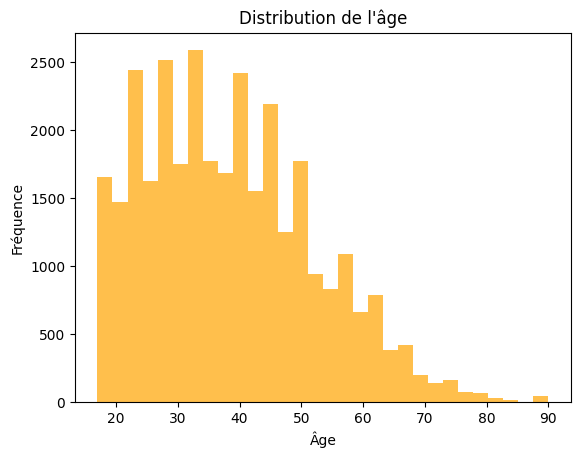

In [20]:
# Afficher un histogramme pour l'âge
plt.hist(data['Age'], bins=30, color='orange', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution de l\'âge')
plt.show()

Cet histogramme offre une représentation visuelle de la distribution des âges dans les données analysées. Il est observable que la fréquence d'individus se concentre de manière significative dans la tranche d'âge allant de 18 à 50 ans, suggérant une forte présence de personnes relativement jeunes dans l'échantillon.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

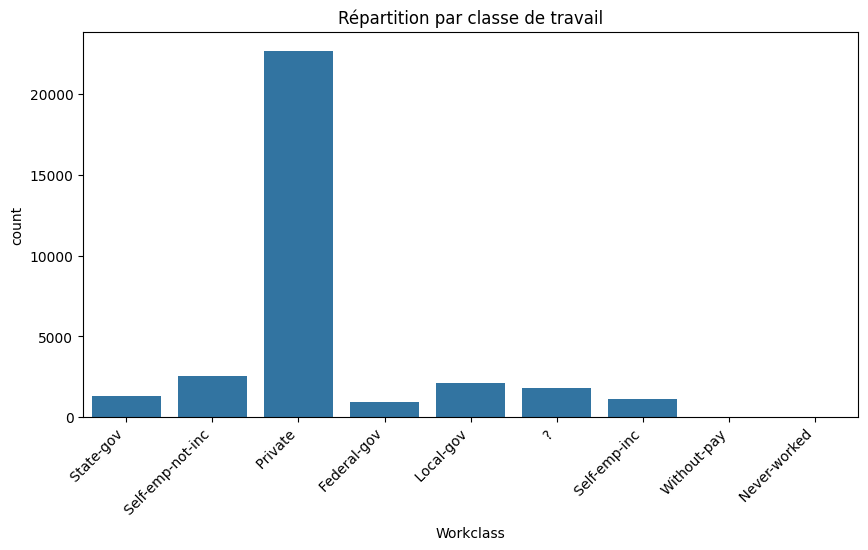

In [24]:
# Afficher un countplot pour la classe de travail (Workclass)
plt.figure(figsize=(10, 5))  
sns.countplot(x='Workclass', data=data)
plt.title('Répartition par classe de travail')
plt.xticks(rotation=45, ha='right')  
plt.show()

L'affichage d'un countplot pour la classe de travail (Workclass) offre des informations importantes sur la répartition des individus selon leurs catégories professionnelles. Une observation particulièrement marquante réside dans la prédominance significative de la catégorie "Private" par rapport aux autres classes de travail. Cette constatation suggère que la majorité des individus dans l'échantillon appartiennent au secteur privé, ce qui peut avoir des implications significatives sur le profil socio-économique de la population étudiée.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

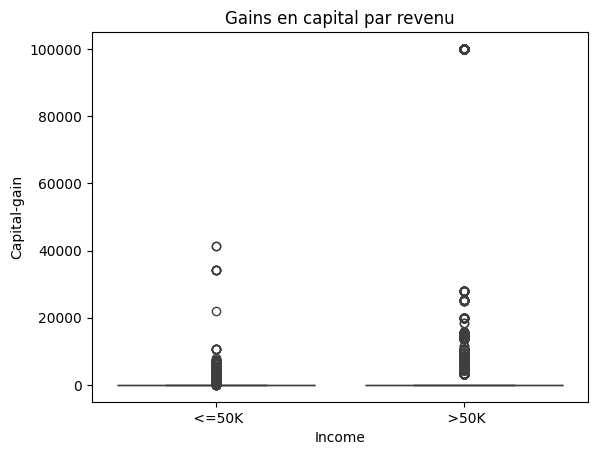

In [25]:
# Afficher une boîte à moustaches pour les gains en capital par revenu
sns.boxplot(x='Income', y='Capital-gain', data=data)
plt.title('Gains en capital par revenu')
plt.show()

L'observation de la boîte à moustaches pour les gains en capital en fonction du revenu suggère que la médiane des gains en capital semble similaire entre les groupes "Income > 50k" et "Income <= 50k". Cette similitude dans les médianes indique que, malgré des différences globales de distribution, il existe des individus dans les deux catégories de revenu réalisant des gains en capital comparables.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

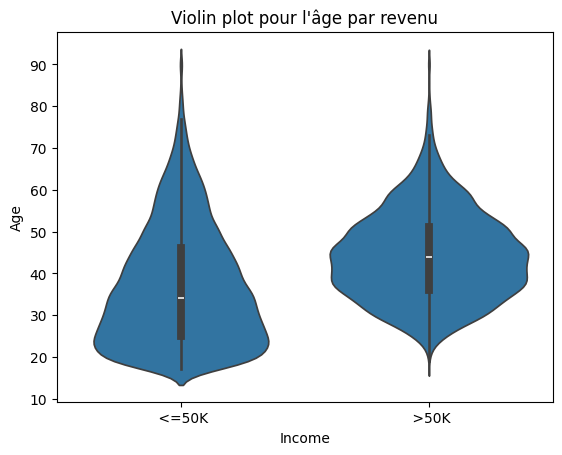

In [26]:
import seaborn as sns

# Afficher un violin plot pour l'âge par revenu
sns.violinplot(x='Income', y='Age', data=data)
plt.title('Violin plot pour l\'âge par revenu')
plt.show()


La présence d'une concentration des âges entre 20 et 40 ans dans la catégorie "Income <=50k" suggère que, dans cette tranche de revenu, il y a un nombre significatif d'individus plus jeunes. Cela pourrait refléter une proportion importante de personnes débutant leur carrière ou occupant des postes moins rémunérés. En revanche, pour la catégorie "Income >50k", où l'âge semble être plus concentré entre 30 et 60 ans, cela pourrait indiquer une tendance vers des revenus plus élevés à mesure que les individus progressent dans leur carrière et gagnent en expérience. Ainsi, l'interprétation suggère une différence dans la structure d'âge entre les deux catégories de revenu, avec une prévalence de jeunes adultes dans la catégorie de revenu inférieur et une concentration plus importante d'individus d'âge moyen dans la catégorie de revenu supérieur.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

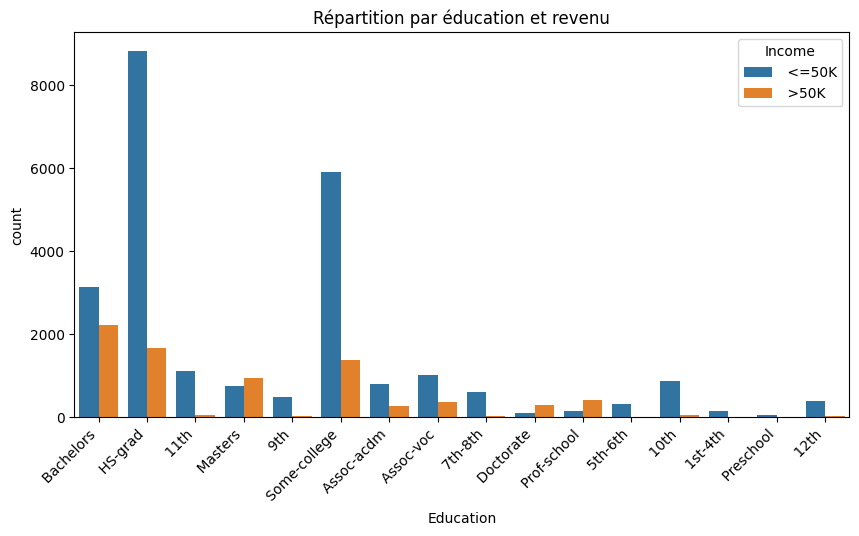

In [27]:
import seaborn as sns

# Afficher un countplot pour l'éducation par revenu
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', hue='Income', data=data)
plt.title('Répartition par éducation et revenu')
plt.xticks(rotation=45, ha='right')
plt.show()


L'observation selon laquelle, pour toutes les catégories d'éducation, les revenus sont presque égaux, à l'exception de "HD-grad" et "some-college", suggère que les individus ayant obtenu un diplôme de fin d'études secondaires (HD-grad) ou ayant suivi certaines études collégiales sont plus susceptibles d'avoir des revenus inférieurs ou égaux à 50 000 $. Cela peut indiquer que ces niveaux d'éducation sont associés à des professions ou des secteurs qui offrent généralement des revenus moins élevés par rapport à d'autres niveaux d'éducation.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

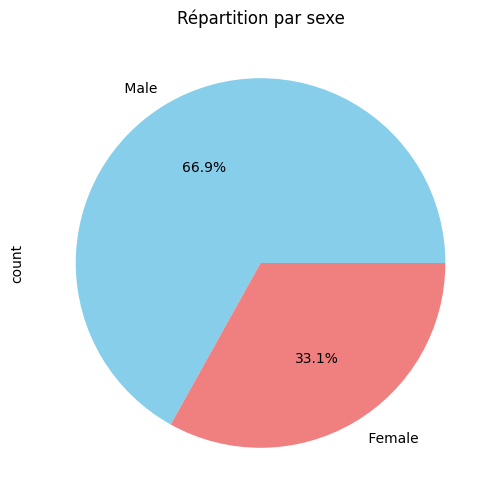

In [28]:
# Afficher un diagramme en secteurs (pie chart) pour la répartition du sexe
plt.figure(figsize=(6, 6))
data['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Répartition par sexe')
plt.show()


L'observation du diagramme en secteurs révèle que les femmes représentent 33,1% de l'échantillon, tandis que les hommes représentent 66,9%. Cette répartition souligne une prédominance numérique des hommes dans la population étudiée.

#### Etape 3 : Préparation des données pour l'entrainement

- **Ensemble de données d'entraînement**

<Axes: >

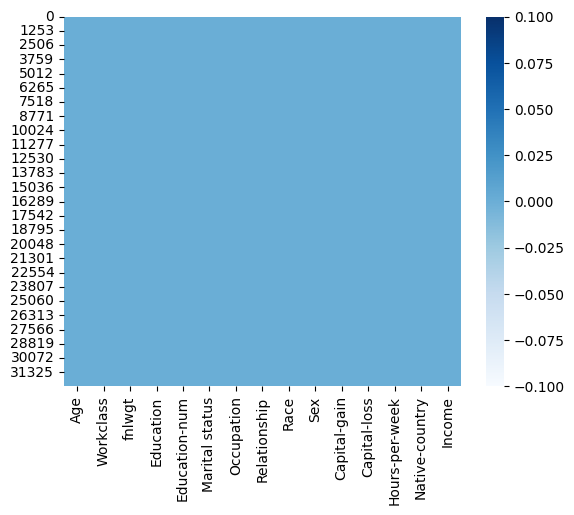

In [29]:
# affichage des données manquantes
sns.heatmap(data.isnull(), cmap = 'Blues')

In [30]:
# Aucune valeur nulle (null) ou NaN (Not a Number)
train_data=pd.read_csv("Census_income_train.csv")

<IPython.core.display.Javascript object>

In [31]:
# Aucune valeur nulle (null) ou NaN (Not a Number)
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

**_Suppression des lignes avec des valeurs inconnues (?)_**

In [32]:
# Commencer par la colonne 'Workclass'
# Obtenir une liste de valeurs booléennes indiquant la présence de '?' dans chaque ligne de la colonne
train_data["Workclass"].str.contains("\?")

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [33]:
# Inverser toutes les valeurs booléennes
train_data["Workclass"].str.contains("\?") == False

0        True
1        True
2        True
3        True
4        True
         ... 
32555    True
32556    True
32557    True
32558    True
32559    True
Name: Workclass, Length: 32560, dtype: bool

In [34]:
# Prendre le sous-ensemble des lignes de l'ensemble de données qui ne contiennent pas de '?'
clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]

In [35]:
# Afficher le nombre de lignes après le nettoyage
len(clean_train_data)

30724

In [36]:
# Répéter le processus pour la colonne 'Occupation'
clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]
len(clean_train_data)

30717

In [37]:
# Répéter le processus pour la colonne 'Native-country'
clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]
len(clean_train_data)

30161

In [38]:
# Enfin, réinitialiser l'index du DataFrame résultant
clean_train_data = clean_train_data.reset_index(drop=True)

In [39]:
# Utiliser '.get_dummies' de pandas pour créer des variables factices 
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

<IPython.core.display.Javascript object>

In [40]:
# Afficher les premières lignes du DataFrame résultant
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [41]:
# Les deux dernières colonnes représentent si le revenu est <=50k ou >50k
# Elles portent la même information, donc on supprime l'une d'entre elles
train_dummies = train_dummies.drop(['Income_ <=50K'], axis=1)

In [42]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# Les caractéristiques d'entrée sont toutes les colonnes sauf la dernière
train_input = train_dummies.iloc[:, :-1]

# La cible (output) est simplement la dernière colonne
train_target = train_dummies.iloc[:, -1]

In [44]:
train_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
# Afficher les premières lignes de la cible
train_target.head()

0    False
1    False
2    False
3    False
4    False
Name: Income_ >50K, dtype: bool

- **Ensemble de données de test**

In [46]:
# Appliquons le même prétraitement sur l'ensemble de données de test
test_data = pd.read_csv("Census_income_test.csv")

<IPython.core.display.Javascript object>

In [47]:
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [48]:
len(test_data)

16281

In [49]:
clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

In [50]:
len(clean_test_data)

15318

In [51]:
clean_test_data = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]

In [52]:
len(clean_test_data)

15315

In [53]:
clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]

In [54]:
len(clean_test_data)

15060

In [55]:
clean_test_data = clean_test_data.reset_index(drop=True)

In [56]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

<IPython.core.display.Javascript object>

In [57]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [58]:
test_dummies = test_dummies.drop(['Income_ <=50K.'],axis=1)

In [59]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

In [60]:
test_target.head()

0    False
1    False
2     True
3     True
4    False
Name: Income_ >50K., dtype: bool

#### Etape 4 : Entrainement & Evaluation du modèle de l'arbre de décision

- **Le modèle avant pruning**

**_Création et visualisation de l'arbre_**

In [61]:
# Définir le modèle en tant que classificateur d'arbre de décision
clf = tree.DecisionTreeClassifier()

In [62]:
# Entraîner le modèle
clf.fit(train_input,train_target)

DecisionTreeClassifier()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

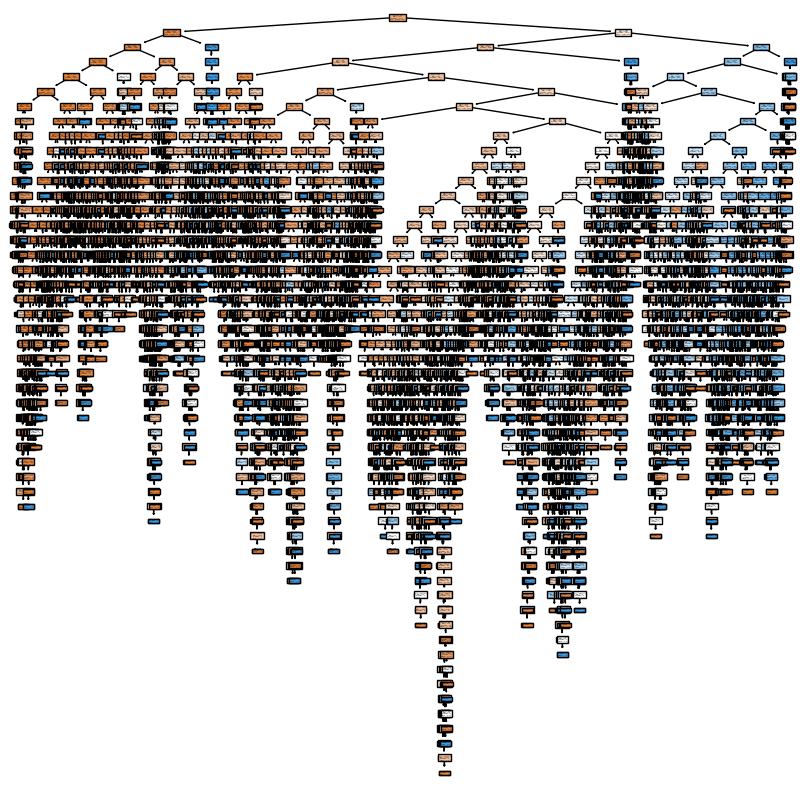

In [63]:
# Tracer l'arbre
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show()
# NB: Cela peut prendre beaucoup de temps (~3 minutes) jusqu'à ce que l'arbre complet soit dessiné

**_Evaluation du modèle_**

In [64]:
# Obtenir les prédictions basées sur les entrées de test
test_pred = clf.predict(test_input)

In [65]:
# Affichez les métriques obtenues à partir des vraies cibles et des prédictions de notre modèle
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.87      0.87      0.87     11360
        True       0.60      0.62      0.61      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.80      0.81     15060



- **Le modèle aprés pruning**

**_Création et visualisation de l'arbre_**

In [66]:
#Définir le modèle en tant que classificateur d'arbre de décision avec élagage afin d'éviter le surajustement. 
#La valeur de 0,001 pour l'élagage semble être un bon choix pour ce modèle particulier
clf = tree.DecisionTreeClassifier(ccp_alpha=0.001)

In [67]:
# Entraîner l'arbre
clf.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

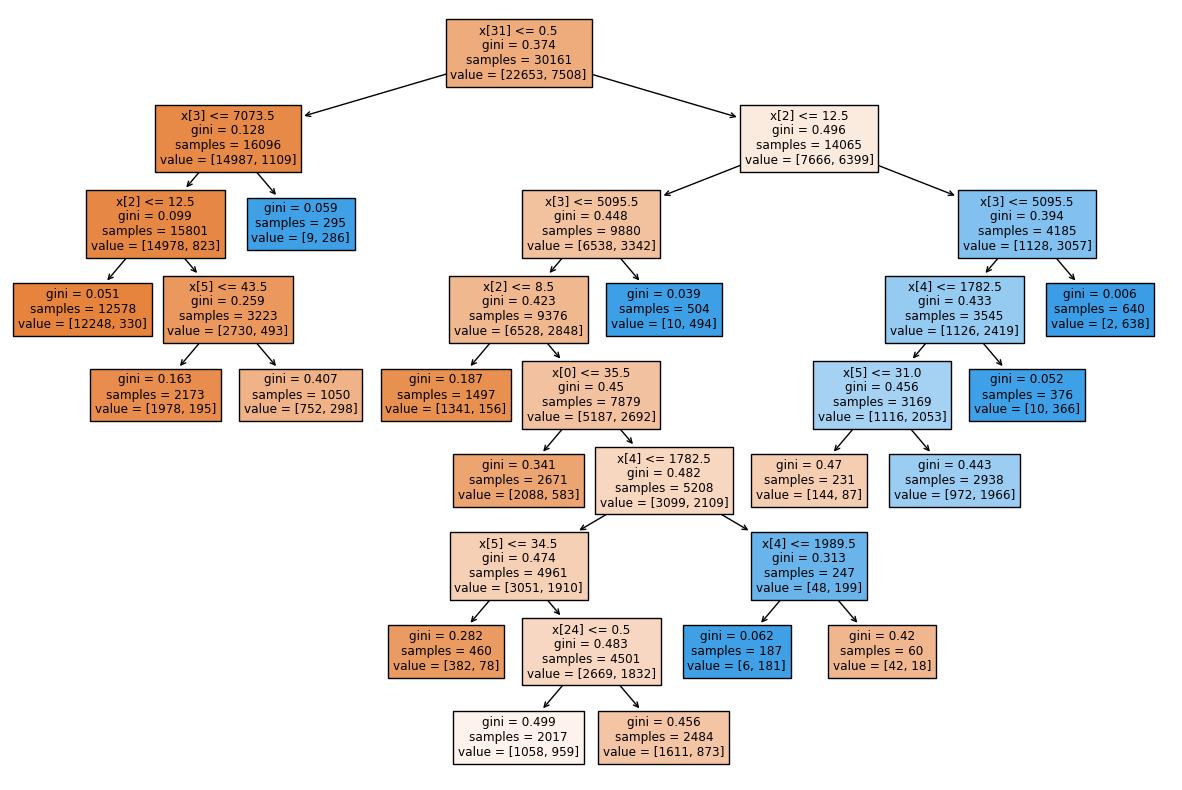

In [68]:
# tracer l'arbre
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

**_Evaluation du modèle_**

In [69]:
# les prédictions basées sur les entrées de test
test_pred = clf.predict(test_input)

In [70]:
# Affichez les métriques obtenues à partir des vraies cibles et des prédictions de notre modèle
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

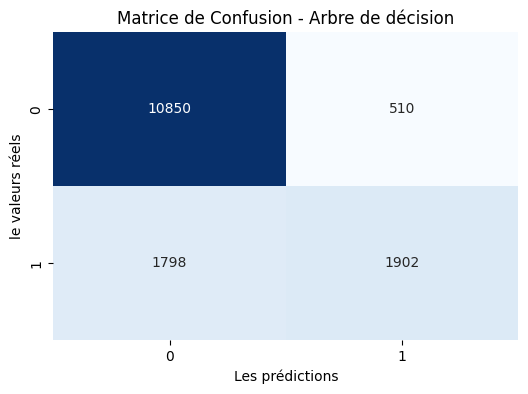

In [71]:
# la matrice de confusion
cm = confusion_matrix(test_target, test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matrice de Confusion - Arbre de décision')
plt.xlabel('Les prédictions')
plt.ylabel('le valeurs réels')
plt.show()

**La matrice de confusion cet arbre de décision est la suivante:**

-1798 représente les vrais négatifs (TN) 

-1902 représente les vrais positifs (TP)

-10850 représente les faux négatifs (FN)

-510 représente les faux positifs (FP)

#### Etape 5 : Entrainement & Evaluation du modèle de la forêt aléatoire

- **Le modèle avant pruning**

In [74]:
# Initialiser le modèle en tant que classificateur de forêt aléatoire
clfr = RandomForestClassifier()

In [75]:
# Entraîner le modèle
clfr.fit(train_input,train_target)

RandomForestClassifier()

In [76]:
# Obtenir les prédictions du modèle sur l'ensemble de données de test
test_pred1 = clfr.predict(test_input)

In [77]:
# Imprimer les métriques obtenues à partir des cibles réelles et des prédictions de notre modèle
print(classification_report(test_target, test_pred1))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11360
        True       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



**_L'entrainement du modele_**

In [78]:
# Initialiser le modèle en tant que classificateur de forêt aléatoire avec 150 arbres (par défaut, il est de 100 arbres)
clfr = RandomForestClassifier(n_estimators = 150)

In [79]:
# Entraîner le modèle
clfr.fit(train_input,train_target)

RandomForestClassifier(n_estimators=150)

**_Evaluation du modèle_**

In [80]:
# Obtenir les prédictions du modèle sur l'ensemble de données de test
test_pred1 = clfr.predict(test_input)

In [81]:
# Imprimer les métriques obtenues à partir des cibles réelles et des prédictions de notre modèle
print(classification_report(test_target, test_pred1))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11360
        True       0.71      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



- **Le modèle aprés pruning**

**_L'entrainement du modèle_**

In [82]:
# Initialiser le modèle en tant que classificateur de forêt aléatoire avec élagage (pruning)
clfr = RandomForestClassifier(ccp_alpha = 0.0001)

In [83]:
# Entraîner le modèle
clfr.fit(train_input,train_target)

RandomForestClassifier(ccp_alpha=0.0001)

**_Evaluation du modèle_**

In [84]:
# Obtenir les prédictions du modèle sur l'ensemble de données de test
test_pred1 = clfr.predict(test_input)

In [85]:
# Imprimer les métriques obtenues à partir des cibles réelles et des prédictions de notre modèle
print(classification_report(test_target, test_pred1))

              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11360
        True       0.77      0.61      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.85      0.86      0.85     15060



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

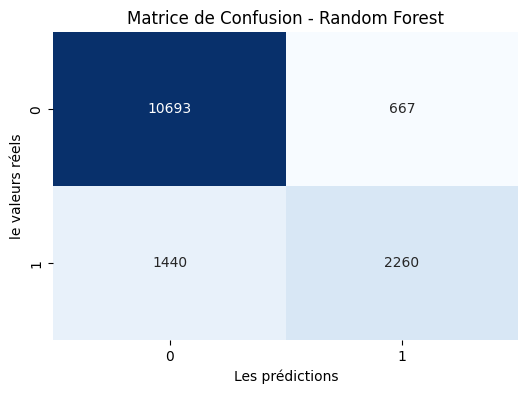

In [86]:
# la matrice de confusion
cm = confusion_matrix(test_target, test_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matrice de Confusion - Random Forest')
plt.xlabel('Les prédictions')
plt.ylabel('le valeurs réels')
plt.show()

**La matrice de confusion cette Random Forest est la suivante:**

-1440 représente les vrais négatifs (TN) 

-2260 représente les vrais positifs (TP)

-10693 représente les faux négatifs (FN)

-667 représente les faux positifs (FP)

###  IV.Conclusion

En conclusion, notre projet visant à modéliser le revenu annuel des individus à l'aide d'arbres de décision et de la forêt aléatoire a fourni des insights significatifs. 

L'analyse comparative entre ces deux approches a révélé que la forêt aléatoire a surpassé les arbres de décision individuels en termes de précision prédictive.